In [7]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import cartopy.feature as cf
from sklearn.metrics import mean_absolute_error,mean_squared_error
from netCDF4 import Dataset
import cartopy.feature as cfe

/home/lucasdmarten/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/lucasdmarten/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/home/lucasdmarten/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


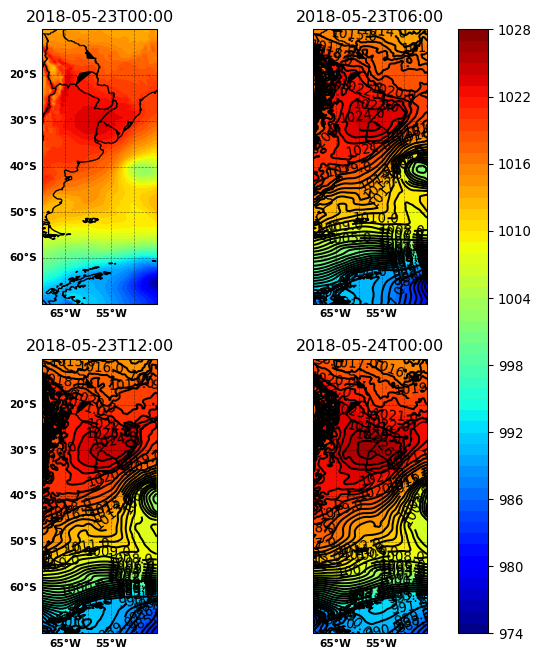

In [10]:
i=0
d = xr.open_dataset('./dados_sinóticos/surface_level.nc')
d = d.sel(time=slice('2018-05-23 00:00:00','2018-05-25 00:00:00'))
blh = d['msl'][0:25]
blh = blh * 10**(-2)
lon = d['longitude']
lat = d['latitude']
time = d['time']
width = 800
height = 800
dpi = 96
resolution = '10m'

levels = list(range(int(blh.min()),int(blh.max()),1))


fig = plt.figure(figsize=(width / dpi, height / dpi), dpi=dpi)



ax1 = plt.subplot(2, 2, 1, projection=ccrs.PlateCarree())
ax1.coastlines()
feature2=cfe.NaturalEarthFeature(category='cultural', scale='10m', 
                        name='admin_0_boundary_lines_land', 
                        color='black' ,edgecolor='face',
                        facecolor=cfe.COLORS['land'])
ax1.add_feature(feature2)
# ax1.set_extent([-60,-45,-25,-36])
cb = ax1.contourf(lon,lat,blh[i,:,:],levels,cmap=get_cmap('jet'))
# cb2 = ax1.contour(lon,lat,blh[i,:,:],levels, colors='black')
plt.clabel(cb2,fmt='%1.1f')
gl1 = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linestyle='--',
                  linewidth=.5, color='black', alpha=0.5)
gl1.xlabels_top = False
gl1.ylabels_left = True
gl1.ylabels_right = False
gl1.xlines = True
# gl.xlocator = mticker.FixedLocator([-70,-65,-60,-55.760,-50,-45])
# gl.ylocator = mticker.FixedLocator([-40,-38,-36,-34,-30.865,-28,-26])
gl1.xformatter = LONGITUDE_FORMATTER
gl1.yformatter = LATITUDE_FORMATTER
gl1.ylabel_style = {'size': 10, 'color': 'black'}
gl1.ylabel_style = {'size':8,'color': 'black', 'weight': 'bold'}
gl1.xlabel_style = {'size': 10, 'color': 'gray'}
gl1.xlabel_style = {'size':8,'color': 'black', 'weight': 'bold'}
ax1.set_title('{}'.format(str(d['time'][i].values)[:16]))






ax2 = plt.subplot(2, 2, 2, projection=ccrs.PlateCarree())
ax2.coastlines()
feature2=cfe.NaturalEarthFeature(category='cultural', scale='10m', 
                        name='admin_0_boundary_lines_land', 
                        color='black' ,edgecolor='face',
                        facecolor=cfe.COLORS['land'])
ax2.add_feature(feature2)
# ax2.set_extent([-60,-45,-25,-36])
cb = ax2.contourf(lon,lat,blh[i+5,:,:],levels,cmap=get_cmap('jet'))
cb2 = ax2.contour(lon,lat,blh[i+5,:,:],levels, colors='black')
plt.clabel(cb2,fmt='%1.1f')

gl2 = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linestyle='--',
                  linewidth=.5, color='black', alpha=0.5)
gl2.xlabels_top = False
gl2.ylabels_left = False
gl2.ylabels_right = False
gl2.xlines = True
# gl.xlocator = mticker.FixedLocator([-70,-65,-60,-55.760,-50,-45])
# gl.ylocator = mticker.FixedLocator([-40,-38,-36,-34,-30.865,-28,-26])
gl2.xformatter = LONGITUDE_FORMATTER
gl2.yformatter = LATITUDE_FORMATTER
gl2.ylabel_style = {'size': 10, 'color': 'black'}
gl2.ylabel_style = {'size':8,'color': 'black', 'weight': 'bold'}
gl2.xlabel_style = {'size': 10, 'color': 'gray'}
gl2.xlabel_style = {'size':8,'color': 'black', 'weight': 'bold'}
ax2.set_title('{}'.format(str(d['time'][i+6].values)[:16]))



ax3 = plt.subplot(2, 2, 3, projection=ccrs.PlateCarree())
ax3.coastlines()
feature2=cfe.NaturalEarthFeature(category='cultural', scale='10m', 
                        name='admin_0_boundary_lines_land', 
                        color='black' ,edgecolor='face',
                        facecolor=cfe.COLORS['land'])
ax3.add_feature(feature2)
# ax3.set_extent([-60,-45,-25,-36])
cb = ax3.contourf(lon,lat,blh[i+10,:,:],levels,cmap=get_cmap('jet'))
cb2 = ax3.contour(lon,lat,blh[i+10,:,:],levels, colors='black')
plt.clabel(cb2,fmt='%1.1f')

gl3 = ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linestyle='--',
                  linewidth=.5, color='black', alpha=0.5)
gl3.xlabels_top = False
gl3.ylabels_left = True
gl3.ylabels_right = False
gl3.xlines = True
# gl.xlocator = mticker.FixedLocator([-70,-65,-60,-55.760,-50,-45])
# gl.ylocator = mticker.FixedLocator([-40,-38,-36,-34,-30.865,-28,-26])
gl3.xformatter = LONGITUDE_FORMATTER
gl3.yformatter = LATITUDE_FORMATTER
gl3.ylabel_style = {'size': 10, 'color': 'black'}
gl3.ylabel_style = {'size':8,'color': 'black', 'weight': 'bold'}
gl3.xlabel_style = {'size': 10, 'color': 'gray'}
gl3.xlabel_style = {'size':8,'color': 'black', 'weight': 'bold'}
ax3.set_title('{}'.format(str(d['time'][i+12].values)[:16]))


ax4 = plt.subplot(2, 2, 4, projection=ccrs.PlateCarree())
ax4.coastlines()
feature2=cfe.NaturalEarthFeature(category='cultural', scale='10m', 
                        name='admin_0_boundary_lines_land', 
                        color='black' ,edgecolor='face',
                        facecolor=cfe.COLORS['land'])
ax4.add_feature(feature2)
# ax4.set_extent([-60,-45,-25,-36])


cb = ax4.contourf(lon,lat,blh[i+15,:,:],levels,cmap=get_cmap('jet'))
cb2 = ax4.contour(lon,lat,blh[i+15,:,:],levels, colors='black')
plt.clabel(cb2,fmt='%1.1f')
gl4 = ax4.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linestyle='--',
                  linewidth=.5, color='black', alpha=0.5)
gl4.xlabels_top = False
gl4.ylabels_left = False
gl4.ylabels_right = False
gl4.xlines = True
gl4.xformatter = LONGITUDE_FORMATTER
gl4.yformatter = LATITUDE_FORMATTER
gl4.ylabel_style = {'size': 10, 'color': 'black'}
gl4.ylabel_style = {'size':8,'color': 'black', 'weight': 'bold'}
gl4.xlabel_style = {'size': 10, 'color': 'gray'}
gl4.xlabel_style = {'size':8,'color': 'black', 'weight': 'bold'}
ax4.set_title('{}'.format(str(d['time'][i+24].values)[:16]))

# plt.title('Localização do parque',loc='left',fontsize=10)
# plt.title('Descrição',loc='right',fontsize=10)
# plt.savefig('contextogeograficoparque.png')
cbar = fig.colorbar(cb, ax=[ax1,ax2,ax3,ax4])
plt.ticklabel_format()
plt.savefig('./{}'.format(i))


In [58]:
value

292.51703

In [43]:
fig.

In [ ]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = get_cmap('jet', 256)
newcolors = viridis(np.linspace(0, 1, 1000))


roxo = np.array([123/256, 104/256, 238/256, 1])
azul = np.array([0/256, 0/256, 255/256, 1])
ciano = np.array([0/256, 255/256, 255/256, 1])
verde = np.array([0/256, 128/256, 0/256, 1])
amarelo = np.array([255/256, 255/256, 0/256, 1])
vermelho = np.array([255/256, 0/256, 0/256, 1])



newcolors[:10, :] = roxo
newcolors[10:20, :] = azul
newcolors[20:30, :] = ciano
newcolors[30:40, :] = verde
newcolors[40:50, :] = amarelo
newcolors[50:, :] = vermelho

# newcolors[101:150, :] = ForestGreen

newcmp = ListedColormap(newcolors)
ForestGreen = np.array([34/256, 139/256, 34/256, 1])
Green = np.array([0/256, 128/256, 0/256, 1])
DarkGreen = np.array([0/256, 100/256, 0/256, 1])



colors = [ForestGreen,Green,DarkGreen]

In [ ]:
plt.figure?